In [447]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [448]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\customer_experience_data.csv")


## **Data Info**

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

## **Data Shapes and Columns**

In [450]:
df.shape

(1000, 14)

In [451]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Location', 'Num_Interactions',
       'Feedback_Score', 'Products_Purchased', 'Products_Viewed',
       'Time_Spent_on_Site', 'Satisfaction_Score', 'Retention_Status',
       'Gender_Encoded', 'Location_Encoded', 'Retention_Status_Encoded'],
      dtype='object')

<style>
.markdown-cell {
    font-size: 18px;
    color: darkgreen;
    background-color: lightyellow;
    padding: 10px;
    border-radius: 5px;
}
</style>


## **Hnadling Missing and Duplicate Datas**

In [452]:
df.isna().sum()

Customer_ID                 0
Age                         0
Gender                      0
Location                    0
Num_Interactions            0
Feedback_Score              0
Products_Purchased          0
Products_Viewed             0
Time_Spent_on_Site          0
Satisfaction_Score          0
Retention_Status            0
Gender_Encoded              0
Location_Encoded            0
Retention_Status_Encoded    0
dtype: int64

In [453]:
df.duplicated().sum()

np.int64(0)

## **Column Removing**

In [454]:
df.drop(["Customer_ID","Retention_Status_Encoded","Location_Encoded"],axis=1,inplace=True)


In [455]:
df.head(5)

,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded
0,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1
1,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1
2,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1
3,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0
4,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1


## **EDA**

## **Classifications Based On Gender**

`Feedback Score Based on Gender and Gender Counts`

In [456]:
#Loaction based feedback score
df.groupby(["Gender", "Location"]).agg(
    Feedback_Score=("Feedback_Score", "sum"),
    Gender_count=("Gender", "count")
).reset_index().style.background_gradient(cmap="Blues")

,Gender,Location,Feedback_Score,Gender_count
0,Female,Rural,439,141
1,Female,Suburban,510,168
2,Female,Urban,475,167
3,Male,Rural,506,171
4,Male,Suburban,525,176
5,Male,Urban,530,177


`Satisfaction Score Based on Gender and Age`

In [457]:
Satisfy_score=df.groupby(["Gender","Age"])["Satisfaction_Score"].sum().reset_index()

Satisfy_score["Age"] = pd.to_numeric(Satisfy_score["Age"], errors="coerce")
Satisfy_score["Satisfaction_Score"] = pd.to_numeric(Satisfy_score["Satisfaction_Score"], errors="coerce")

Satisfy_score.dtypes

Gender                object
Age                    int64
Satisfaction_Score     int64
dtype: object

In [458]:
Satisfy_score

,Gender,Age,Satisfaction_Score
0,Female,18,67
1,Female,19,40
2,Female,20,49
3,Female,21,41
4,Female,22,62
...,...,...,...
99,Male,65,70
100,Male,66,88
101,Male,67,53
102,Male,68,66


In [459]:
df["Age"].min()


np.int64(18)

In [460]:
df["Age"].max()

np.int64(69)

In [461]:
#Convert Age to Categories using pd.cut 
bins=[0,18,30,45,60,70]
labels=["Teenager(0-18)","Young Adult(19-30)","Adult(31-45)","Middle Age(46-60)","Senior(61+)"]
Satisfy_score["Age_Group"]=pd.cut(Satisfy_score["Age"],bins=bins, labels=labels)
Satisfy_score

,Gender,Age,Satisfaction_Score,Age_Group
0,Female,18,67,Teenager(0-18)
1,Female,19,40,Young Adult(19-30)
2,Female,20,49,Young Adult(19-30)
3,Female,21,41,Young Adult(19-30)
4,Female,22,62,Young Adult(19-30)
...,...,...,...,...
99,Male,65,70,Senior(61+)
100,Male,66,88,Senior(61+)
101,Male,67,53,Senior(61+)
102,Male,68,66,Senior(61+)


## **Visualization**

`Feedback Score Visualization`

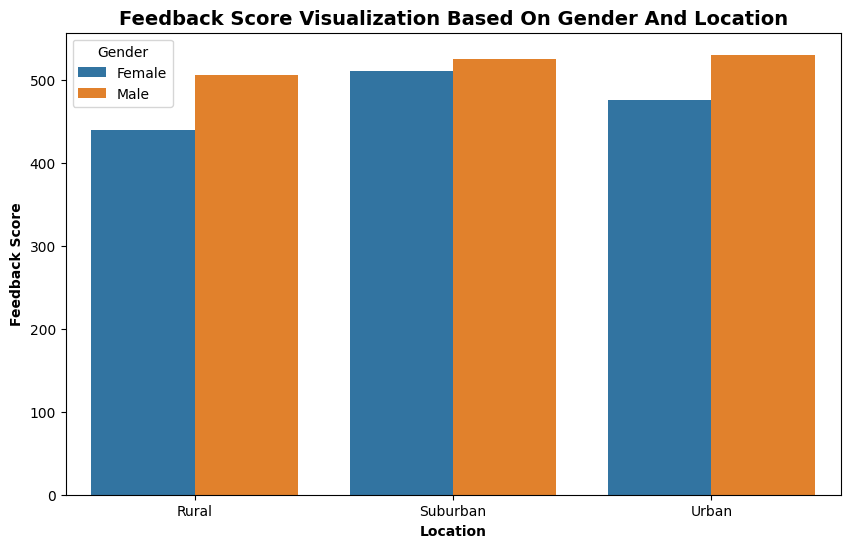

In [462]:
Locat_Classifi = df.groupby(["Gender", "Location"]).agg(
    Feedback_Score=("Feedback_Score", "sum"),
    Gender_count=("Gender", "count")
).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=Locat_Classifi,x="Location",y="Feedback_Score",hue="Gender")
plt.title("Feedback Score Visualization Based On Gender And Location",fontweight="bold",fontsize=14)
plt.xlabel("Location",fontweight="bold",fontsize=10)
plt.ylabel("Feedback Score",fontweight="bold",fontsize=10)
plt.show()


`Satisfaction Score Visualization`

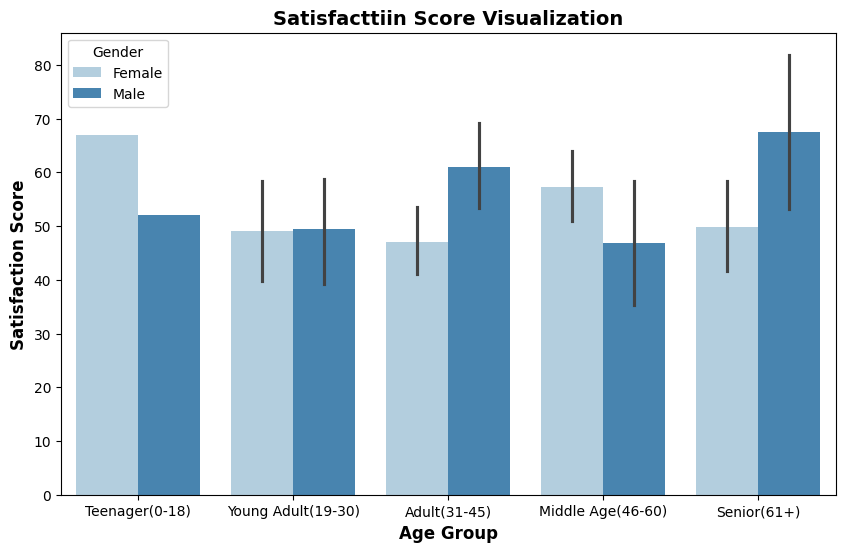

In [463]:
plt.figure(figsize=(10,6))
sns.barplot(data=Satisfy_score,x="Age_Group",y="Satisfaction_Score",hue="Gender",palette="Blues")
plt.title("Satisfacttiin Score Visualization",fontweight="bold",fontsize=14)
plt.xlabel("Age Group",fontweight="bold",fontsize=12)
plt.ylabel("Satisfaction Score",fontweight="bold",fontsize=12)
plt.show()

`Time Spent On Site`

In [464]:
df["Time_Spent_on_Site"].idxmax() #Highest Time Spent On Site 
df.loc[796]

Age                          22
Gender                   Female
Location                  Rural
Num_Interactions              8
Feedback_Score                3
Products_Purchased            8
Products_Viewed               6
Time_Spent_on_Site    59.947722
Satisfaction_Score            8
Retention_Status       Retained
Gender_Encoded                0
Name: 796, dtype: object

In [465]:
df["Time_Spent_on_Site"].idxmin()#Lowest Time Spent On Site 
df.loc[757]

Age                         20
Gender                  Female
Location                 Urban
Num_Interactions            14
Feedback_Score               5
Products_Purchased           3
Products_Viewed             46
Time_Spent_on_Site    5.114208
Satisfaction_Score           9
Retention_Status      Retained
Gender_Encoded               0
Name: 757, dtype: object

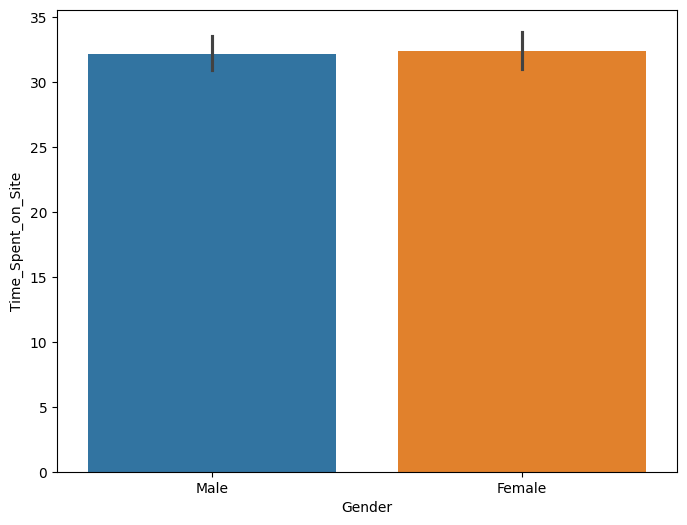

In [466]:
#Time Spent on site based on gender 
Ts_Os=df[["Gender","Time_Spent_on_Site"]]

plt.figure(figsize=(8,6))
sns.barplot(data=Ts_Os,x="Gender",y="Time_Spent_on_Site",hue="Gender")
plt.show()

`Retention Classification`

In [467]:
retention_counts = df["Retention_Status"].value_counts()
print(retention_counts)


Retention_Status
Retained    694
Churned     306
Name: count, dtype: int64


In [468]:
Retention_s = df.groupby("Gender")["Retention_Status"].value_counts().unstack().reset_index()
print(Retention_s)

Retention_Status  Gender  Churned  Retained
0                 Female      150       326
1                   Male      156       368


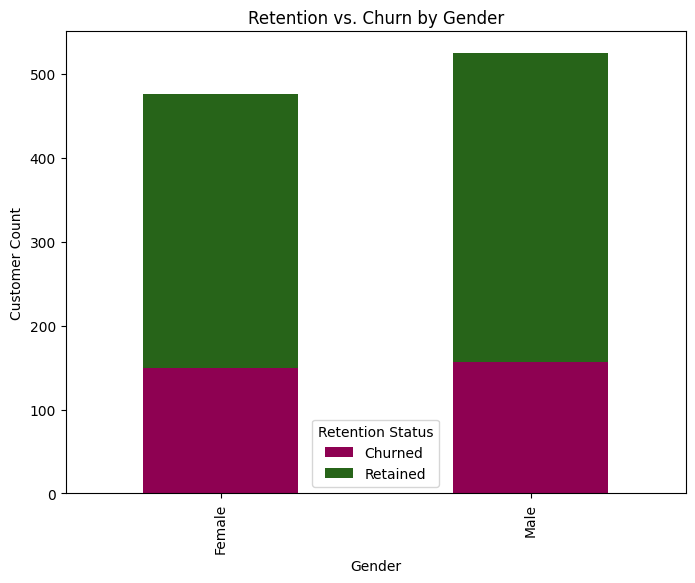

In [469]:
Retention_s.set_index("Gender").plot(kind="bar", stacked=True, figsize=(8,6), colormap="PiYG")

plt.title("Retention vs. Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Customer Count")
plt.legend(title="Retention Status")
plt.show()


In [470]:
df.head(5)

,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded
0,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1
1,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1
2,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1
3,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0
4,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1


## **Products Viewed VS Product Purchased By Gender**

In [471]:
product_classifi=df.groupby("Gender")[["Products_Viewed","Products_Purchased"]].sum().reset_index()
product_classifi

,Gender,Products_Viewed,Products_Purchased
0,Female,12807,5040
1,Male,14563,5377


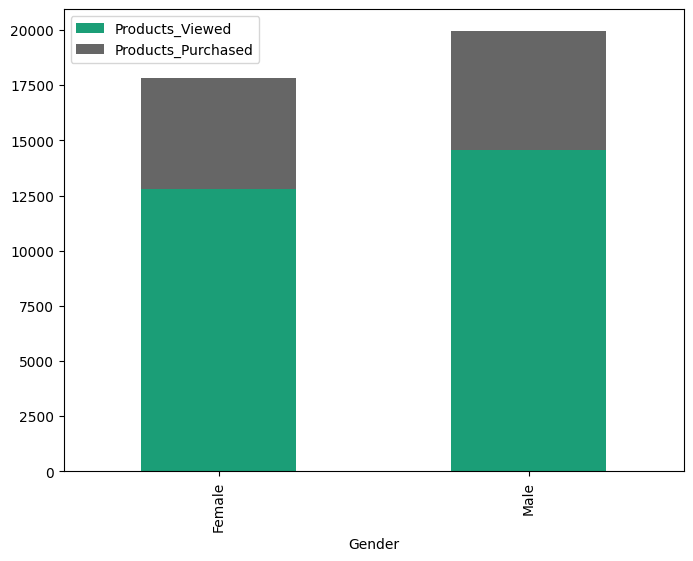

In [472]:
product_classifi.set_index("Gender").plot(kind="bar", stacked=True, figsize=(8,6), colormap="Dark2")
plt.show()


`Alternate Visualize For Better Understanding`

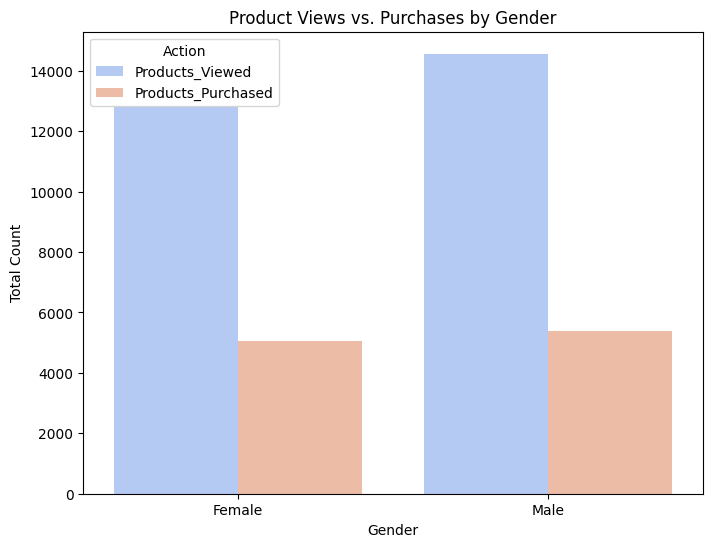

In [473]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape data for plotting
product_summary = product_classifi.groupby("Gender")[["Products_Viewed", "Products_Purchased"]].sum().reset_index()

plt.figure(figsize=(8,6))

# Create grouped bar chart
sns.barplot(data=product_summary.melt(id_vars="Gender", var_name="Action", value_name="Count"),
            x="Gender", y="Count", hue="Action", palette="coolwarm")

plt.title("Product Views vs. Purchases by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Count")
plt.legend(title="Action")
plt.show()


## **Machine Learning Models**

In [474]:
df.head(5)

,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded
0,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1
1,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1
2,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1
3,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0
4,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1


              precision    recall  f1-score   support

     Churned       0.20      0.05      0.08        62
    Retained       0.68      0.91      0.78       138

    accuracy                           0.65       200
   macro avg       0.44      0.48      0.43       200
weighted avg       0.53      0.65      0.56       200



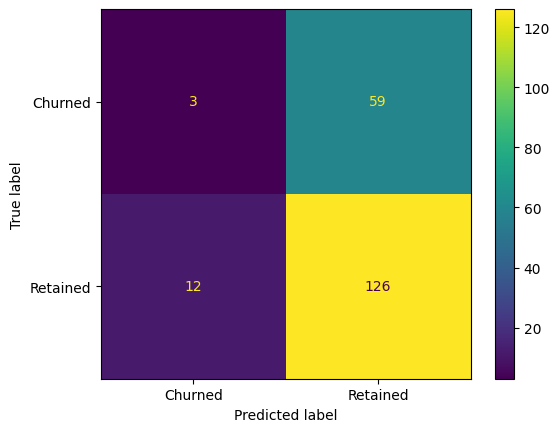

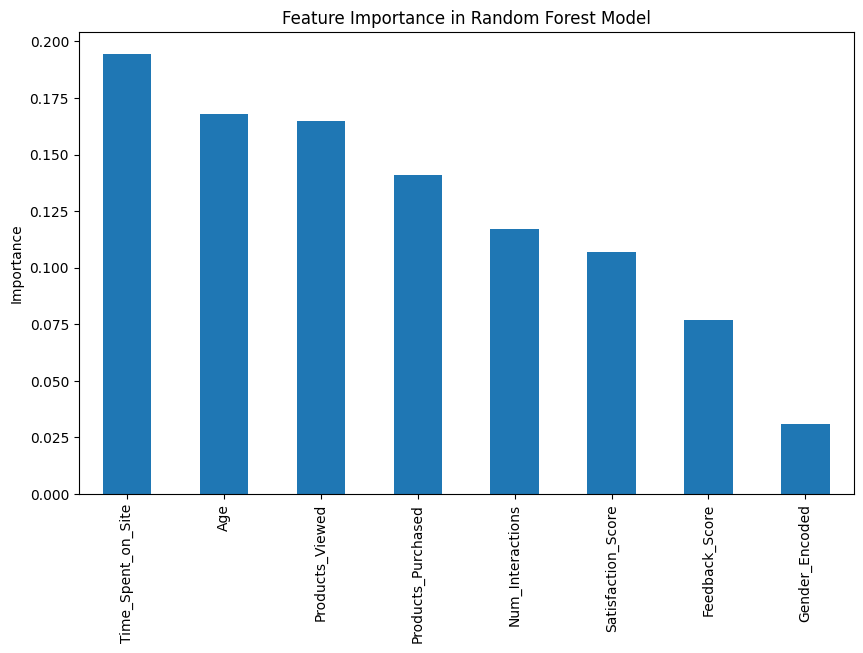

Number of customers predicted to churn: 259
Number of customers predicted to be retained: 741


In [475]:
le=LabelEncoder()
# Encode categorical variable 'Gender' for modeling
df['Gender_Encoded'] = le.fit_transform(df['Gender'])

# Define features and target
features = ['Age', 'Num_Interactions', 'Feedback_Score', 'Products_Purchased', 
            'Products_Viewed', 'Time_Spent_on_Site', 'Satisfaction_Score', 
            'Gender_Encoded']
target = 'Retention_Status'

X = df[features]
y = df[target]

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Churned', 'Retained'])
disp.plot()
plt.show()

# Feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=features)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Random Forest Model')
plt.ylabel('Importance')
plt.show()

# Predict number of customers likely to churn
X_scaled = scaler.transform(X)
predictions = rf_model.predict(X_scaled)
churn_count = np.sum(predictions == 'Churned')
retained_count = np.sum(predictions == 'Retained')
print(f"Number of customers predicted to churn: {churn_count}")
print(f"Number of customers predicted to be retained: {retained_count}")